In [1]:
cd /Users/rodrickleary/Downloads/autism-screening-for-toddlers\ 2

/Users/rodrickleary/Downloads/autism-screening-for-toddlers 2


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

df = pd.read_csv('Toddler Autism dataset July 2018.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
Case_No                   1054 non-null int64
A1                        1054 non-null int64
A2                        1054 non-null int64
A3                        1054 non-null int64
A4                        1054 non-null int64
A5                        1054 non-null int64
A6                        1054 non-null int64
A7                        1054 non-null int64
A8                        1054 non-null int64
A9                        1054 non-null int64
A10                       1054 non-null int64
Age_Mons                  1054 non-null int64
Qchat-10-Score            1054 non-null int64
Sex                       1054 non-null object
Ethnicity                 1054 non-null object
Jaundice                  1054 non-null object
Family_mem_with_ASD       1054 non-null object
Who completed the test    1054 non-null object
Class/ASD Traits          1054 non-null object
dtypes: int64

In [4]:
for column_name in df.columns:
    print("Unique values in column {} are: {}".format(column_name, df[column_name].unique()))

Unique values in column Case_No are: [   1    2    3 ... 1052 1053 1054]
Unique values in column A1 are: [0 1]
Unique values in column A2 are: [0 1]
Unique values in column A3 are: [0 1]
Unique values in column A4 are: [0 1]
Unique values in column A5 are: [0 1]
Unique values in column A6 are: [0 1]
Unique values in column A7 are: [1 0]
Unique values in column A8 are: [1 0]
Unique values in column A9 are: [0 1]
Unique values in column A10 are: [1 0]
Unique values in column Age_Mons are: [28 36 24 20 21 33 22 17 25 15 18 12 29 35 32 19 14 13 30 23 34 26 31 27
 16]
Unique values in column Qchat-10-Score are: [ 3  4 10  9  8  5  6  2  0  7  1]
Unique values in column Sex are: ['f' 'm']
Unique values in column Ethnicity are: ['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica']
Unique values in column Jaundice are: ['yes' 'no']
Unique values in column Family_mem_with_ASD are: ['no' 'yes']
Unique values in column W

In [5]:
df.isnull().sum()*100/df.isnull().count()

Case_No                   0.0
A1                        0.0
A2                        0.0
A3                        0.0
A4                        0.0
A5                        0.0
A6                        0.0
A7                        0.0
A8                        0.0
A9                        0.0
A10                       0.0
Age_Mons                  0.0
Qchat-10-Score            0.0
Sex                       0.0
Ethnicity                 0.0
Jaundice                  0.0
Family_mem_with_ASD       0.0
Who completed the test    0.0
Class/ASD Traits          0.0
dtype: float64

In [6]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
Class_ASD_labels = gle.fit_transform(df['Class/ASD Traits '])
Class_ASD_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

Sex_labels = gle.fit_transform(df['Sex'])
Sex_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

Ethnicity_labels = gle.fit_transform(df['Ethnicity'])
Ethnicity_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

Jaundice_labels = gle.fit_transform(df['Jaundice'])
Jaundice_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

Family_mem_labels = gle.fit_transform(df['Family_mem_with_ASD'])
Family_mem_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

Who_completed_labels = gle.fit_transform(df['Who completed the test'])
Who_completed_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}

In [7]:
df['Class/ASD Labels'] = Class_ASD_labels
df['Sex Labels'] = Sex_labels
df['Who completed the test Labels'] = Who_completed_labels
df['Family_mem_with_ASD Labels'] = Class_ASD_labels
df['Jaundice Labels'] = Jaundice_labels
df['Ethnicity Labels'] = Ethnicity_labels


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 25 columns):
Case_No                          1054 non-null int64
A1                               1054 non-null int64
A2                               1054 non-null int64
A3                               1054 non-null int64
A4                               1054 non-null int64
A5                               1054 non-null int64
A6                               1054 non-null int64
A7                               1054 non-null int64
A8                               1054 non-null int64
A9                               1054 non-null int64
A10                              1054 non-null int64
Age_Mons                         1054 non-null int64
Qchat-10-Score                   1054 non-null int64
Sex                              1054 non-null object
Ethnicity                        1054 non-null object
Jaundice                         1054 non-null object
Family_mem_with_ASD              1054 non-

In [9]:
df['Class/ASD Traits '].value_counts(normalize=True)

Yes    0.690702
No     0.309298
Name: Class/ASD Traits , dtype: float64

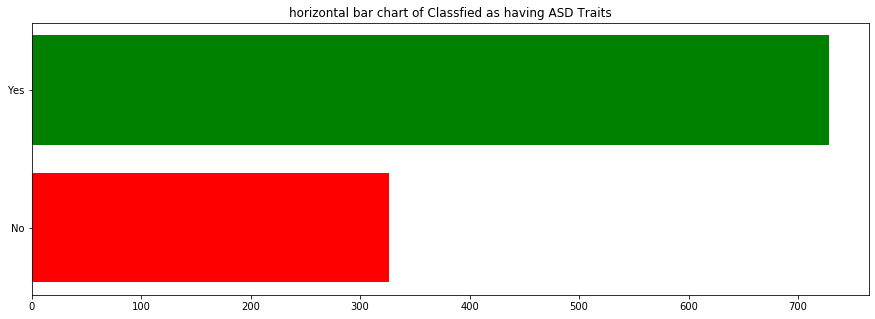

In [10]:
plt.figure(figsize=(15,5))
plt.barh(df.groupby('Class/ASD Traits ')['Class/ASD Traits '].count().index, 
        df.groupby('Class/ASD Traits ')['Class/ASD Traits '].count(), 
        color=["red","green"])
plt.title("horizontal bar chart of Classfied as having ASD Traits")

plt.show()

In [11]:
copy_df=df.drop(columns=['Ethnicity Labels', 'Who completed the test Labels'])
copy_df.corr()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Class/ASD Labels,Sex Labels,Family_mem_with_ASD Labels,Jaundice Labels
Case_No,1.000000,0.050828,-0.002668,0.082087,0.073426,0.055263,0.041315,0.087687,0.023916,0.069870,-0.027257,0.027098,0.077110,0.079966,0.066949,0.079966,-0.002757
A1,0.050828,1.000000,0.463227,0.244362,0.247524,0.284808,0.373083,0.332705,0.208197,0.322226,0.130966,0.040508,0.614064,0.503810,0.111508,0.503810,-0.005613
A2,-0.002668,0.463227,1.000000,0.206927,0.265867,0.259105,0.309461,0.294314,0.251865,0.268784,0.157498,0.037744,0.592424,0.463467,0.067086,0.463467,0.046039
A3,0.082087,0.244362,0.206927,1.000000,0.547100,0.349086,0.297719,0.211375,0.243758,0.379129,0.003848,-0.109880,0.592885,0.409701,0.063299,0.409701,-0.006874
A4,0.073426,0.247524,0.265867,0.547100,1.000000,0.348459,0.347693,0.318546,0.251504,0.427683,0.016872,-0.087873,0.642890,0.505204,0.105087,0.505204,0.027464
A5,0.055263,0.284808,0.259105,0.349086,0.348459,1.000000,0.415309,0.348913,0.316661,0.441892,0.045347,0.018448,0.649518,0.563297,0.129724,0.563297,0.025135
A6,0.041315,0.373083,0.309461,0.297719,0.347693,0.415309,1.000000,0.361758,0.280556,0.416213,0.072162,0.065907,0.659377,0.569424,0.025144,0.569424,-0.004882
A7,0.087687,0.332705,0.294314,0.211375,0.318546,0.348913,0.361758,1.000000,0.257228,0.360686,0.175114,0.021442,0.619053,0.563177,0.044680,0.563177,0.048327
A8,0.023916,0.208197,0.251865,0.243758,0.251504,0.316661,0.280556,0.257228,1.000000,0.293457,0.082004,0.080505,0.543229,0.427155,0.076609,0.427155,0.003202
A9,0.069870,0.322226,0.268784,0.379129,0.427683,0.441892,0.416213,0.360686,0.293457,1.000000,0.028710,-0.048650,0.671638,0.577336,0.087463,0.577336,0.012801


In [12]:
df[['A1', 'A4', 'A5', 'A6', 'A7', 'A9']].corr()

,A1,A4,A5,A6,A7,A9
A1,1.000000,0.247524,0.284808,0.373083,0.332705,0.322226
A4,0.247524,1.000000,0.348459,0.347693,0.318546,0.427683
A5,0.284808,0.348459,1.000000,0.415309,0.348913,0.441892
A6,0.373083,0.347693,0.415309,1.000000,0.361758,0.416213
A7,0.332705,0.318546,0.348913,0.361758,1.000000,0.360686
A9,0.322226,0.427683,0.441892,0.416213,0.360686,1.000000


In [13]:
import statsmodels.api as sm

X = df[['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'Family_mem_with_ASD Labels', 'Ethnicity Labels', 'Who completed the test Labels']]

Y = df['Class/ASD Labels']

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

/Users/rodrickleary/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Class/ASD Labels   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.124e+30
Date:                Sun, 12 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:19:15   Log-Likelihood:                 33963.
No. Observations:                1054   AIC:                        -6.791e+04
Df Residuals:                    1044   BIC:                        -6.786e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                         -2.671e-15   5.47e-16     -4.884      0.000   -3.74e-15    -1.6e-15
A1                             2.894e-15   1.79e-16     16.147      0.000    2.54e-15    3.25e-15
A4                            -7.381e-16    1.8e-16     -4.099      0.000   -1.09e-15   -3.85e-16
A5                            -1.294e-15   1.88e-16     -6.866      0.000   -1.66e-15   -9.24e-16
A6                             9.454e-16   1.93e-16      4.907      0.000    5.67e-16    1.32e-15
A7                             2.012e-16   1.94e-16      1.037      0.300    -1.8e-16    5.82e-16
A9                            -1.388e-17   1.93e-16     -0.072      0.943   -3.93e-16    3.65e-16
Family_mem_with_ASD Labels        1.0000   2.77e-16   3.61e+15      0.000       1.000       1.000
Ethnicity Labels              -1.457e-16   3.68e-17     -3.958      0.000   -2.18e-16   -7.35e-17
Who completed the test Labels  1.162e-16   1.19e-16      0.975      0.330   -1.18e-16     3.5e-16
==============================================================================
Omnibus:                      200.071   Durbin-Watson:                   0.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.000
Skew:                           0.115   Prob(JB):                     2.79e-10
Kurtosis:                       2.026   Cond. No.                         54.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
X = df[['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'Ethnicity Labels']]

Y = df['Class/ASD Labels']

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Class/ASD Labels   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     275.9
Date:                Sun, 12 Jan 2020   Prob (F-statistic):          1.69e-232
Time:                        15:19:15   Log-Likelihood:                -130.90
No. Observations:                1054   AIC:                             277.8
Df Residuals:                    1046   BIC:                             317.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1251      0.031      4.023      0.000       0.064       0.186
A1                   0.1797      0.019      9.365      0.000       0.142       0.217
A4                   0.1506      0.020      7.700      0.000       0.112       0.189
A5                   0.1908      0.020      9.444      0.000       0.151       0.230
A6                   0.1731      0.021      8.317      0.000       0.132       0.214
A7                   0.2281      0.020     11.155      0.000       0.188       0.268
A9                   0.1759      0.021      8.428      0.000       0.135       0.217
Ethnicity Labels    -0.0080      0.004     -1.961      0.050      -0.016    6.99e-06
==============================================================================
Omnibus:                       18.716   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.461
Skew:                           0.332   Prob(JB):                     5.94e-05
Kurtosis:                       2.966   Cond. No.                         24.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
X = df[['A1', 'A4', 'A5', 'A6', 'A7', 'A9']]

Y = df['Class/ASD Labels']

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Class/ASD Labels   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     320.3
Date:                Sun, 12 Jan 2020   Prob (F-statistic):          6.14e-233
Time:                        15:19:15   Log-Likelihood:                -132.84
No. Observations:                1054   AIC:                             279.7
Df Residuals:                    1047   BIC:                             314.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0737      0.017      4.396      0.000       0.041       0.107
A1             0.1806      0.019      9.401      0.000       0.143       0.218
A4             0.1503      0.020      7.678      0.000       0.112       0.189
A5             0.1904      0.020      9.412      0.000       0.151       0.230
A6             0.1780      0.021      8.596      0.000       0.137       0.219
A7             0.2306      0.020     11.283      0.000       0.191       0.271
A9             0.1752      0.021      8.385      0.000       0.134       0.216
==============================================================================
Omnibus:                       17.894   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.581
Skew:                           0.324   Prob(JB):                     9.23e-05
Kurtosis:                       2.953   Cond. No.                         5.04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import train_test_split
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(knn.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(knn.fit(X, Y).score(X, Y)))

With 20% Holdout: 0.9146919431279621
Testing on Sample: 0.9155597722960152


In [17]:
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        63
           1       0.98      0.92      0.95       148

    accuracy                           0.93       211
   macro avg       0.91      0.94      0.92       211
weighted avg       0.94      0.93      0.93       211



In [18]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.92 (+/- 0.04)


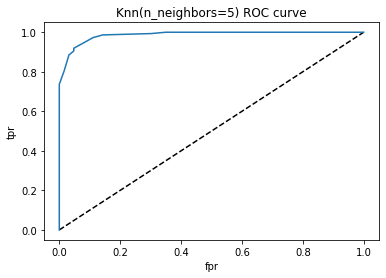

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=5) ROC curve')
plt.show()

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.9863792363792363

In [21]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
print(k_range)
param_grid = dict(n_neighbors=k_range)
print(param_grid)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, Y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=10, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [22]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9193548387096774
{'n_neighbors': 21}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')


In [23]:
knn = neighbors.KNeighborsClassifier(n_neighbors=21)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(knn.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(knn.fit(X, Y).score(X, Y)))

With 20% Holdout: 0.9289099526066351
Testing on Sample: 0.9212523719165086


In [24]:
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        63
           1       0.97      0.95      0.96       148

    accuracy                           0.94       211
   macro avg       0.92      0.93      0.93       211
weighted avg       0.94      0.94      0.94       211



In [25]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy: 0.92 (+/- 0.03)


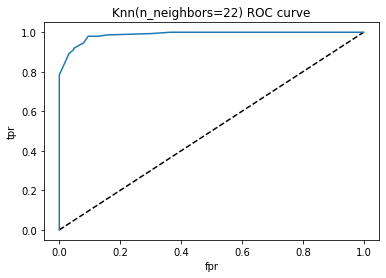

In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=22) ROC curve')
plt.show()

In [27]:
roc_auc_score(y_test,y_pred_proba)

0.9877198627198627

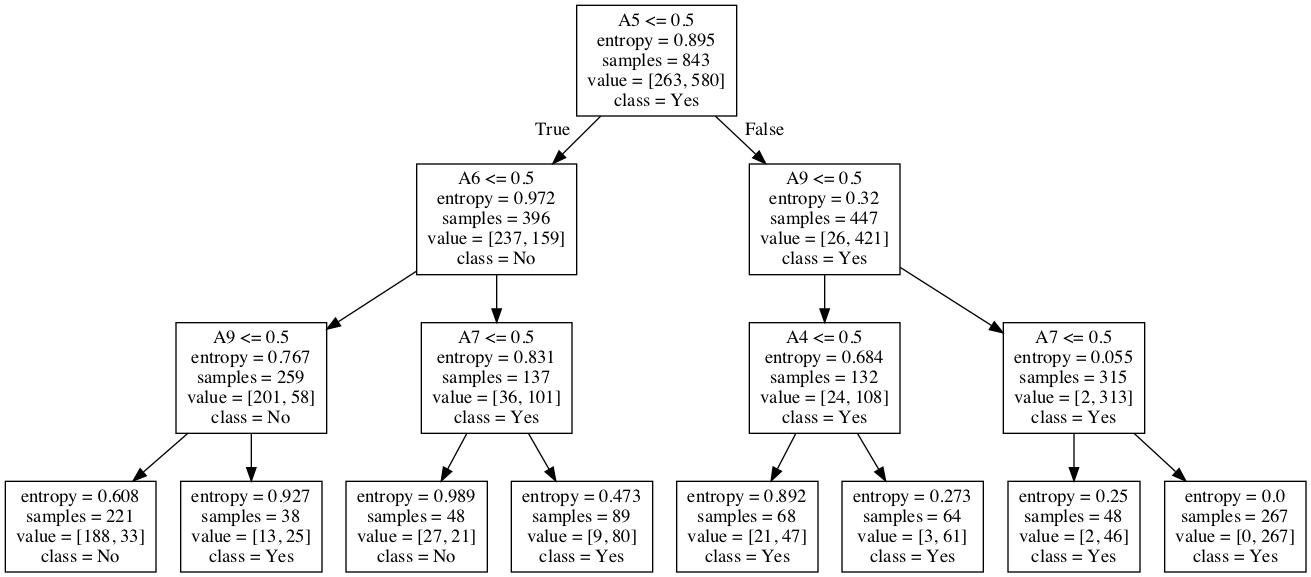

In [28]:
from sklearn import tree

from IPython.display import Image

import pydotplus
from pydotplus import graphviz

classifier_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    max_features=1,
)

Y = df['Class/ASD Traits ']
classifier_tree.fit(X_train, y_train)

dot_data = tree.export_graphviz(
    classifier_tree, out_file=None,
    feature_names=X.columns,
    class_names=Y,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [29]:
classifier_tree.fit(X_train, y_train)

print('Train:', classifier_tree.score(X_train, y_train))
print('Test:', classifier_tree.score(X_test, y_test))

Train: 0.8493475682087782
Test: 0.8388625592417062


In [30]:
from sklearn.metrics import classification_report
y_pred = classifier_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71        63
           1       0.87      0.91      0.89       148

    accuracy                           0.84       211
   macro avg       0.81      0.79      0.80       211
weighted avg       0.84      0.84      0.84       211



In [31]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier_tree, X, Y, cv=10)
print("Average: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Average: 0.86 (+/- 0.05)


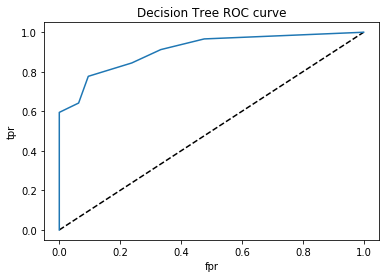

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
y_pred_proba = classifier_tree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Decision Tree')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Decision Tree ROC curve')
plt.show()

In [33]:
roc_auc_score(y_test,y_pred_proba)

0.9103925353925354

In [34]:
classifier_tree.get_params()

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 1,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [35]:
max_depths_range= list(range(1,32))

In [36]:
param_grid = dict(max_depth=max_depths_range)
print(param_grid)

{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]}


In [37]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(classifier_tree, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X, Y)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy', max_depth=3,
                                              max_features=1,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 1

In [38]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9127134724857685
{'max_depth': 6}
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=1, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


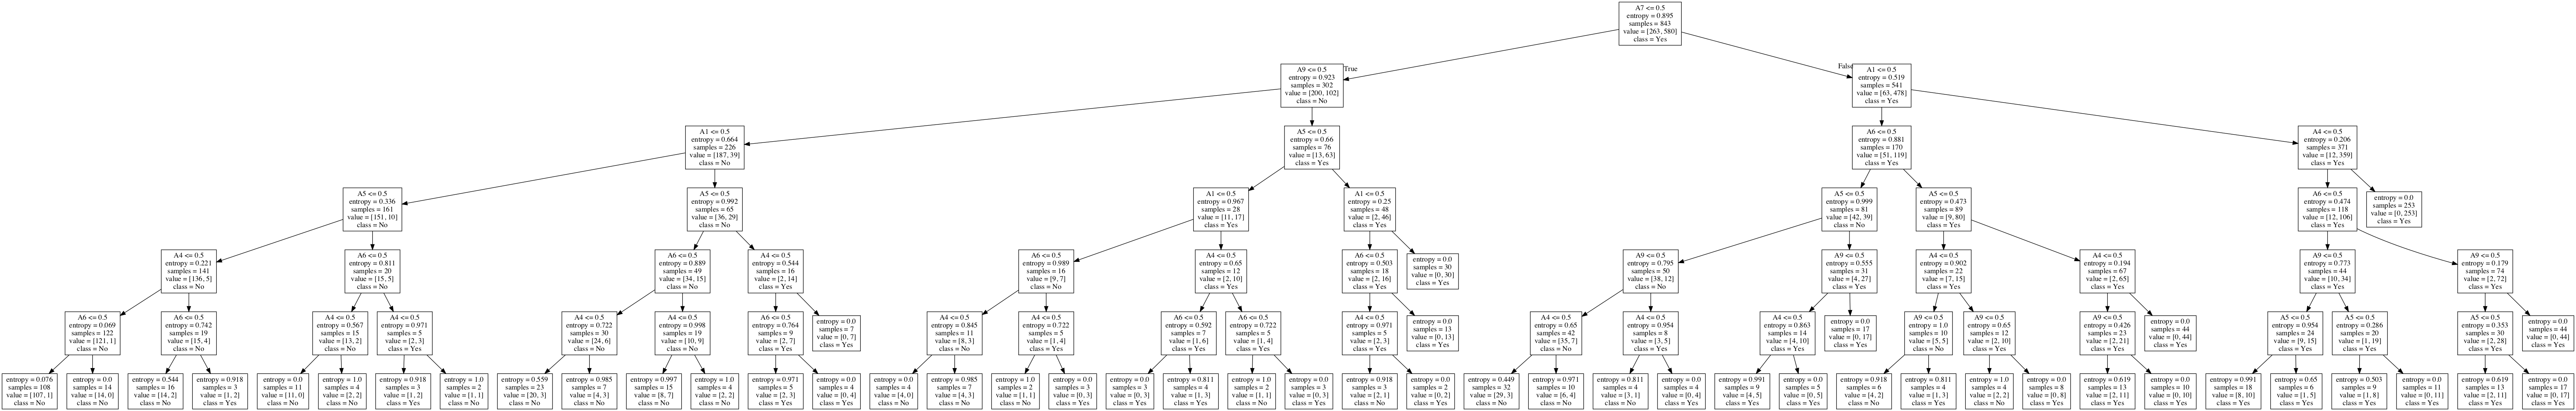

In [39]:
from sklearn import tree

from IPython.display import Image

import pydotplus
from pydotplus import graphviz

classifier_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6,
    max_features=1,
)

Y = df['Class/ASD Traits ']
classifier_tree.fit(X_train, y_train)

dot_data = tree.export_graphviz(
    classifier_tree, out_file=None,
    feature_names=X.columns,
    class_names=Y,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [40]:
classifier_tree.fit(X_train, y_train)

print('Train:', classifier_tree.score(X_train, y_train))
print('Test:', classifier_tree.score(X_test, y_test))

Train: 0.9252669039145908
Test: 0.9146919431279621


In [41]:
from sklearn.metrics import classification_report
y_pred = classifier_tree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85        63
           1       0.93      0.95      0.94       148

    accuracy                           0.91       211
   macro avg       0.90      0.89      0.90       211
weighted avg       0.91      0.91      0.91       211



In [42]:
score = cross_val_score(classifier_tree, X, Y, cv=10)
print("Average: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Average: 0.91 (+/- 0.04)


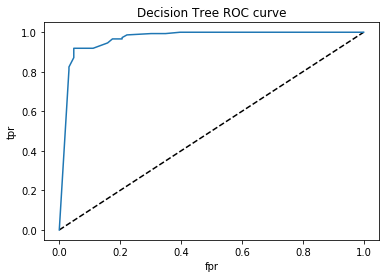

In [43]:
y_pred_proba = classifier_tree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Decision Tree')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Decision Tree ROC curve')
plt.show()

In [44]:
roc_auc_score(y_test,y_pred_proba)

0.9669669669669669